In [35]:
pip install wooldridge shap

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wooldridge as wd
import shap


In [37]:
from scipy import stats
from sklearn.utils import resample

In [66]:
x = np.random.randn(100)

In [67]:
boot = resample(x, replace=True, n_samples=len(x))

In [68]:
sample = [resample(x, replace=True, n_samples=len(x)) for _ in range(500)]

In [69]:
estad = [np.mean(m) for m in sample]



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: ylabel='Density'>

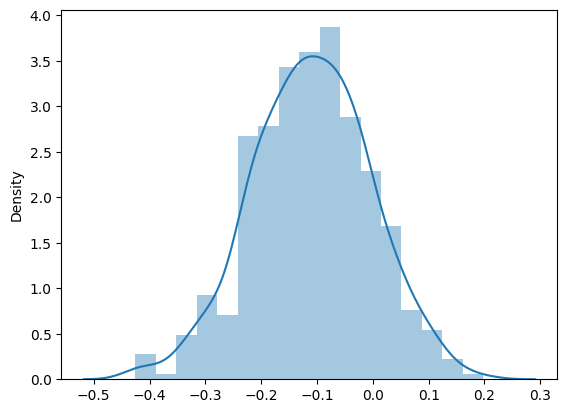

In [70]:
sns.distplot(estad)

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

In [72]:
!pip install wooldridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import wooldridge as wd

In [105]:
train = pd.read_csv ('/content/data_inlf_train.csv')

In [106]:
test = pd.read_csv('/content/data_inlf_test.csv')

In [107]:
y = train['inlf']

In [108]:
x = train.drop(columns= 'inlf')


In [109]:
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [4, 5, 6, 7, 8]}

tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)

In [110]:
tree_grid.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [4, 5, 6, 7, 8]})

In [115]:
y_pred = tree_grid.predict(test)

In [98]:
metricas(y, y)

Accuracy: 1.0
f1_score: 1.0


In [99]:
rf = RandomForestClassifier()
rf.fit(X, y)
y_pred = rf.predict(X)
metricas(y, y)

Accuracy: 1.0
f1_score: 1.0


In [100]:
param_grid = {'n_estimators':[10, 20],
              'max_depth': [4, 5, 6, 7, 8],
              'min_samples_split': [5, 6],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 15, 20]}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3)
rf_grid.fit(X, y)
y_pred = rf_grid.predict(X)
metricas(y, y)

Accuracy: 1.0
f1_score: 1.0


In [116]:
luna = pd.DataFrame(data= y_pred, columns= ['Expected']). reset_index().rename(columns = {'index': 'id'})

In [117]:
luna

,id,Expected
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
184,184,1
185,185,0
186,186,1
187,187,0


In [118]:
luna.to_csv('taller.csv', index = False)